In [3]:
# step : load data

import pandas as pd
advertising = pd.read_csv('/content/advertising.csv')

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


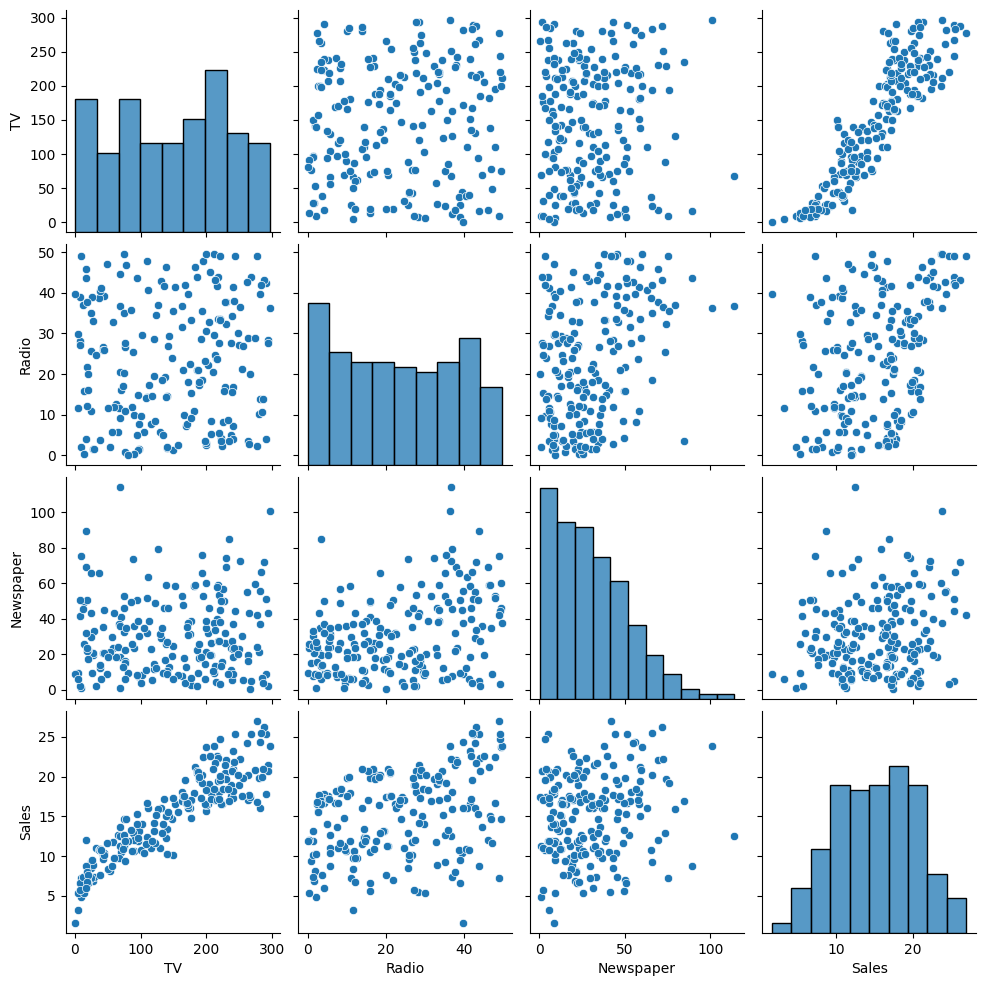

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(advertising)
plt.show()

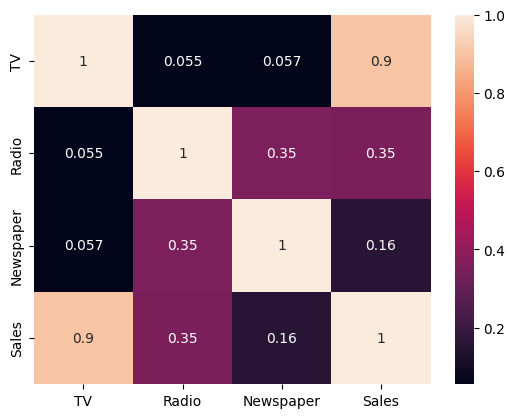

In [11]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

**What is Linear Regression? **
- Linear regression predicts the relationship between two variables by assuming a linear connection between the independent and dependent variables

**Application**
- Applied in various domains like economics and finance, this method analyzes and forecasts data trends.

**Type of Regression**
 - Simple Linear Regression
 - Multiple Linear Regression  

**Simple Linear Regression**
      Yi = β0 + β1Xi
Where,  
Yi = Dependent variable (output - Sales )
β0 = constant/Intercept
β1 = Slope/Intercept
Xi = Independent variable (Input - TV)

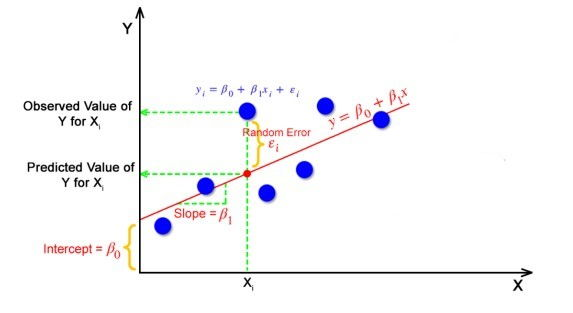  

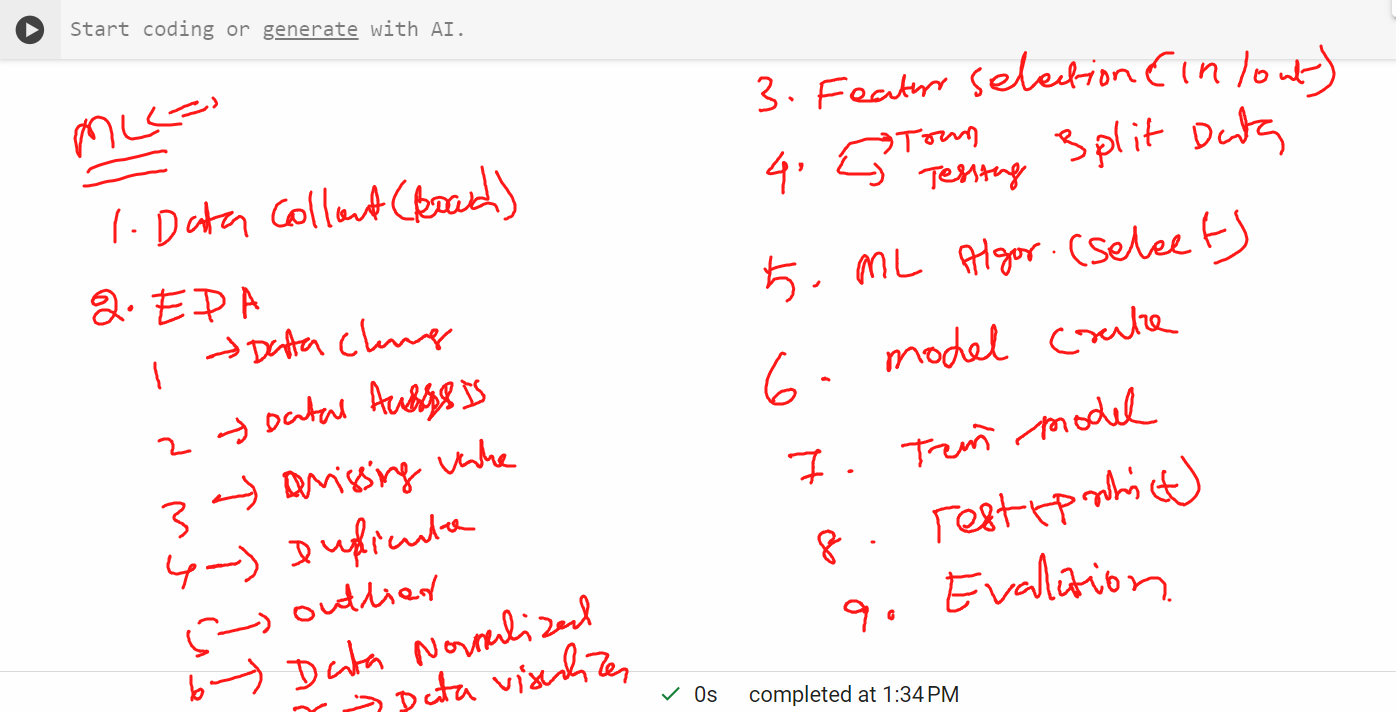

In [12]:
# feature selection :
X = advertising['TV'] # input
y = advertising['Sales'] # output

In [13]:
# Split the data into Training & Testing :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.8, test_size=0.2, random_state=12)

In [14]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(160,)
(40,)
(160,)
(40,)


In [17]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
lr.params

const    7.170850
TV       0.053421
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     585.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.14e-55
Time:                        09:59:23   Log-Likelihood:                -364.03
No. Observations:                 160   AIC:                             732.1
Df Residuals:                     158   BIC:                             738.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1708      0.379     18.911      0.0

**Model summary**

- coefficient for TV is 0.053
- R – squared is 78



In [20]:
# performance evalute

X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [22]:
X_test_sm.head()

,const,TV
23,1.0,228.3
182,1.0,56.2
172,1.0,19.6
21,1.0,237.4
63,1.0,102.7


In [24]:
y_pred.head(10)

23     19.366760
182    10.173084
172     8.217893
21     19.852887
63     12.657140
11     18.640241
61     21.129638
32     12.363327
164    13.431738
7      13.591999
dtype: float64

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-Squared : ', r2_score(y_test, y_pred))


RMSE :  2.03093463634247
R-Squared :  0.8805923491796662


In [26]:
#
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)

y_pred1

array([19.36675993, 10.17308448,  8.2178926 , 19.85288687, 12.65713973,
       18.64024055, 21.12963785, 12.36332674, 13.4317376 , 13.59199923,
       15.89442464, 16.16686941,  7.61958252, 14.71917269, 22.64678127,
        9.46793331, 13.20202927, 10.79276278, 18.84323861, 17.49169887,
       18.12206128,  8.12707768, 23.00469891, 10.35471432, 18.36779578,
       12.53427248, 18.21821826, 11.88788391,  7.87065907,  8.53841586,
       10.9423403 , 22.53459813, 17.72674926, 20.57406421,  8.16981411,
       17.04830837, 16.01729189, 17.79619597,  9.54806412,  7.63560868])

In [28]:
#get intercept
print( lr.intercept_ )
#get slope
print( lr.coef_ )

7.170849959613911
[0.05342054]
